In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset= pd.read_csv('KMeans.csv')
dataset

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [3]:
x= dataset.iloc[:,[1,2]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


C:\Users\saeed\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saeed\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saeed\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saeed\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

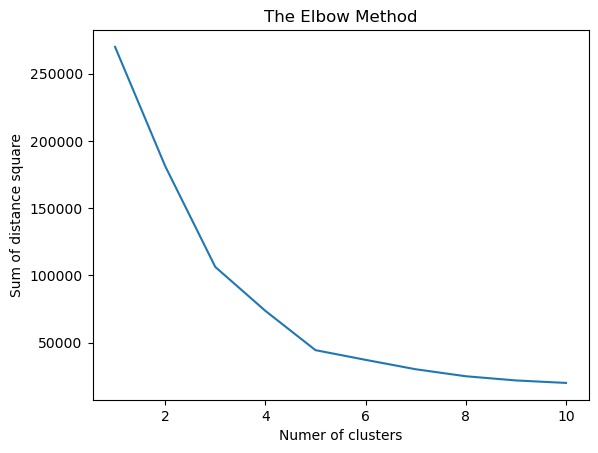

In [10]:
#Model implementation
from sklearn.cluster import KMeans
#using elbow method to find number of k
sdsq=[]
for i in range(1, 11):
    kmean=KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmean.fit(x)
    sdsq.append(kmean.inertia_)
plt.plot(range(1, 11), sdsq)
plt.title('The Elbow Method')
plt.ylabel('Sum of distance square')
plt.xlabel('Numer of clusters')
plt.show()

In [11]:
#fitting model
kmean=KMeans(n_clusters=5, init = 'k-means++', random_state=42)
y_preds=kmean.fit_predict(x)
y_preds

C:\Users\saeed\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saeed\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [31]:
x1=x.iloc[y_preds==0,0]
x1

43     39
46     40
47     40
48     40
49     40
       ..
121    67
122    69
126    71
132    72
142    76
Name: Annual Income (k$), Length: 81, dtype: int64

In [32]:
y1= x.iloc[y_preds==0,1]
y1

43     61
46     55
47     47
48     42
49     42
       ..
121    40
122    58
126    35
132    34
142    40
Name: Spending Score (1-100), Length: 81, dtype: int64

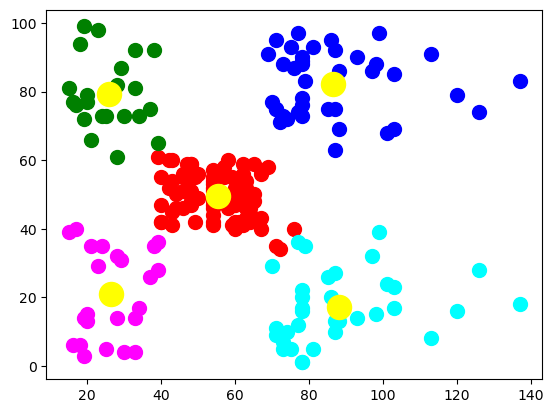

In [33]:
#visualization
plt.scatter(x.iloc[y_preds==0,0], x.iloc[y_preds==0,1], s=100, c='red', label='cluster1')
plt.scatter(x.iloc[y_preds==1,0], x.iloc[y_preds==1,1], s=100, c='blue', label='cluster2')
plt.scatter(x.iloc[y_preds==2,0], x.iloc[y_preds==2,1], s=100, c='green', label='cluster3')
plt.scatter(x.iloc[y_preds==3,0], x.iloc[y_preds==3,1], s=100, c='cyan', label='cluster4')
plt.scatter(x.iloc[y_preds==4,0], x.iloc[y_preds==4,1], s=100, c='magenta', label='cluster5')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], s=300, c='yellow', label='centroid')
plt.show()